# Sample Notebook


## Basic Outline


In this notebook:

- We first import the necessary libraries and modules. You'll need to replace `your_model_file` and `YourModel` with the actual names of your model's file and class.
- We then load and prepare the data using the `DataPrep` and `TextProcessor` classes from the `src` directory.
- We split the data into training and validation sets, train the model on the training data, and validate it on the validation data.
- If we're happy with the model's performance, we train it on all data.
- We then load the test data, prepare it in the same way as the training data, and make predictions on it.
- Finally, we save the predictions to a CSV file for submission.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from prep.data_prep import DataPrep
from prep.text_prep import TextProcessor

# from model_file import Model


# Load the data
data = pd.read_csv("../data/eval_student_summaries/summaries_train.csv")

In [ ]:
# Prepare the data
data_prep = DataPrep()
text_prep = TextProcessor()
data = text_prep.cleantext(data)
data["text"] = data["text"].apply(text_prep.prepare)

In [ ]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Define your model
model = Model()

In [ ]:
# Train your model
model.train(train_data["text"], train_data["label"])

In [ ]:
# Validate your model
val_predictions = model.predict(val_data['text'])
print(f'Validation accuracy: {accuracy_score(val_data['label'], val_predictions)}')


In [ ]:
# If you're happy with your model, train it on all data
model.train(data["text"], data["label"])

In [ ]:
# Load the test data
test_data = pd.read_csv("data/eval_student_summaries/summaries_test.csv")

# Prepare the test data in the same way as the training data
test_data = data_prep.prepare(test_data)
test_data["text"] = test_data["text"].apply(text_prep.prepare)

# Make predictions on the test data
test_predictions = model.predict(test_data["text"])

# Save your predictions to a CSV file for submission
submission = pd.DataFrame({"id": test_data["id"], "prediction": test_predictions})
submission.to_csv("data/submission.csv", index=False)

print("Saved predictions to data/submission.csv")

## Data Exploration


This assumes that your data is in a pandas DataFrame and that you're working with a text classification problem.

Adjust this to fit the specific competition and dataset.

In this section:

- We first import the necessary libraries and load the data.
- We then display the first few rows of the data to get a sense of what it looks like.
- We plot the distribution of labels in the data. This can help identify any class imbalance that might affect model performance.
- We plot the distribution of text lengths. This can give an idea of the range of text lengths the model will need to handle.
- Finally, we create a word cloud of the most common words in the text. This can give a sense of the most important words in the data.


In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the data
data = pd.read_csv("../data/eval_student_summaries/prompts_train.csv")

# Display the first few rows of the data
print(data.head())

  prompt_id                                    prompt_question  \
0    39c16e  Summarize at least 3 elements of an ideal trag...   
1    3b9047  In complete sentences, summarize the structure...   
2    814d6b  Summarize how the Third Wave developed over su...   
3    ebad26  Summarize the various ways the factory would u...   

                prompt_title  \
0                 On Tragedy   
1  Egyptian Social Structure   
2             The Third Wave   
3    Excerpt from The Jungle   

                                         prompt_text  
0  Chapter 13 \r\nAs the sequel to what has alrea...  
1  Egyptian society was structured like a pyramid...  
2  Background \r\nThe Third Wave experiment took ...  
3  With one member trimming beef in a cannery, an...  


### Display the distribution of labels


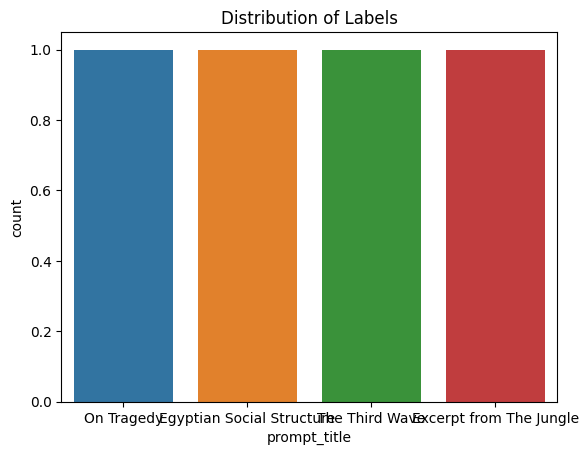

In [13]:
# Create a countplot for 'prompt_title'
sns.countplot(x="prompt_title", data=data)
plt.title("Distribution of Labels")
plt.show()
plt.close()

### Display the length of the texts


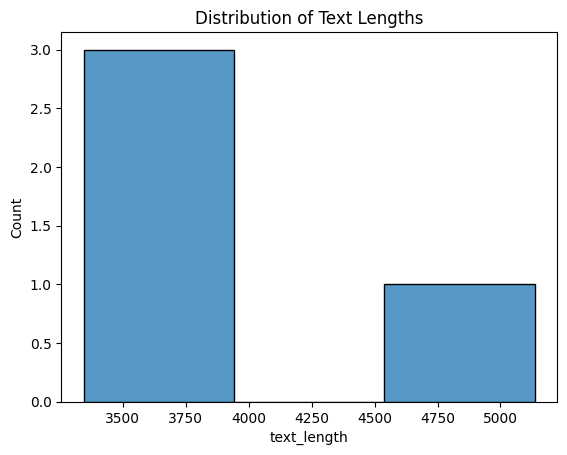

In [14]:
# Create a histogram of text lengths
data["text_length"] = data["prompt_text"].apply(len)
sns.histplot(data["text_length"])
plt.title("Distribution of Text Lengths")
plt.show()

### Display the most common words in the text


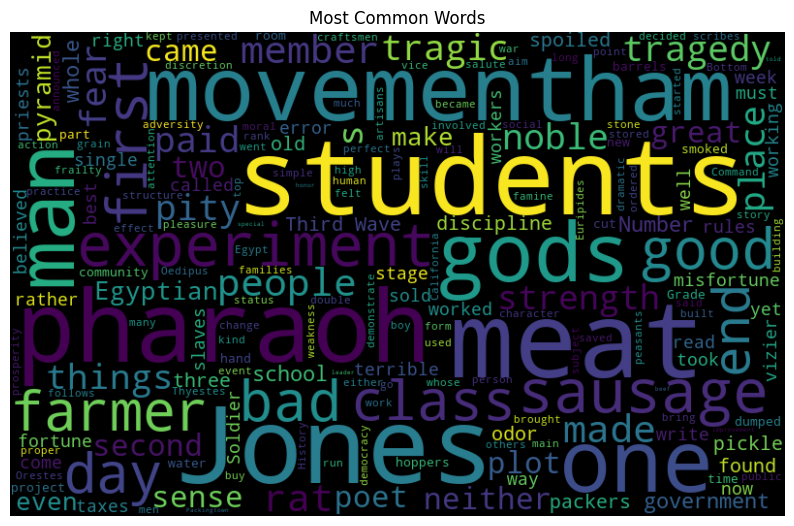

In [17]:
# Generate a wordcloud image from all the text
all_text = " ".join(data["prompt_text"])
wordcloud = WordCloud(
    width=800, height=500, random_state=21, max_font_size=110
).generate(all_text)

# Display the wordcloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words")
plt.show()
plt.close()

## Performance Metrics


Calculate and display more detailed performance metrics for a text classification model in a Jupyter notebook.

This assumes that you've already trained your model and made predictions on your validation data.

In this section:

- We first calculate the classification report, which includes precision, recall, and F1-score for each class, as well as overall accuracy.
- We then calculate and display the confusion matrix, which shows the number of true positives, true negatives, false positives, and false negatives for each class.
- If your problem is binary classification, we also calculate and display the ROC curve, which shows the trade-off between the true positive rate and false positive rate for different threshold values.
  - The area under the ROC curve (AUC) is also calculated as a single-number summary of model performance.

The specific metrics that are most relevant will depend on your problem.

Example:
If you have imbalanced classes, you might want to focus more on precision, recall, or the F1-score rather than overall accuracy.


### Import necessary libraries


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Calculate the classification report


In [ ]:
report = classification_report(val_data["label"], val_predictions, output_dict=True)
print(pd.DataFrame(report).transpose())

### Calculate and display the confusion matrix


In [ ]:
cm = confusion_matrix(val_data["label"], val_predictions)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

### If your problem is binary classification, you can also calculate and display the ROC curve


In [ ]:
if len(np.unique(val_data["label"])) == 2:
    fpr, tpr, _ = roc_curve(val_data["label"], val_predictions)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(
        fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.show()

## Sentiment Analysis


Sentiment analysis is a common type of binary classification problem in NLP, where the goal is to determine whether a given text is positive or negative.

In this section:

- We calculate the classification report as before, but now we specify that the classes are 'Negative' and 'Positive'.
- We calculate and display the confusion matrix as before, but now we label the axes with 'Negative' and 'Positive'.
- We calculate and display the ROC curve as before. This is particularly useful for binary classification problems like sentiment analysis, as it shows how the model's performance changes as the threshold for deciding between 'Negative' and 'Positive' is varied.


In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Calculate the classification report


In [ ]:
report = classification_report(
    val_data["label"],
    val_predictions,
    target_names=["Negative", "Positive"],
    output_dict=True,
)
print(pd.DataFrame(report).transpose())

### Calculate and display the confusion matrix


In [ ]:
cm = confusion_matrix(val_data["label"], val_predictions)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"],
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Calculate and display the ROC curve


In [ ]:
fpr, tpr, _ = roc_curve(val_data["label"], val_predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning


Tune the hyperparameters of a model. This example uses `GridSearchCV` from `scikit-learn`, which performs an exhaustive search over a specified parameter grid.
This assumes that you're using a model that's compatible with `scikit-learn`.

In this section:

- We first define the model and the parameter grid. The parameter grid is a dictionary where the keys are the parameter names and the values are lists of values to try.
- We then create a GridSearchCV object, specifying the model, the parameter grid, the number of folds to use for cross-validation (cv), and the scoring metric.
- We fit the GridSearchCV object to the data. This will perform cross-validation for each combination of parameters in the parameter grid.
- We then print the best parameters and the best score found by the grid search.
- Finally, we retrieve the best model, which is an instance of the model with the best parameters. We can use this model to make predictions.

Remember, grid search can be computationally expensive, especially if the parameter grid is large and the model is complex.

You might want to start with a smaller grid or use a more efficient search method like `RandomizedSearchCV`.


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define your model
model = Model()

# Define the parameter grid
param_grid = {
    "param1": [value1, value2, value3],
    "param2": [value1, value2, value3],
    # Add more parameters here as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# Fit the GridSearchCV object to the data
grid_search.fit(train_data["text"], train_data["label"])

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Retrieve the best model
best_model = grid_search.best_estimator_

# You can now use best_model to make predictions, just like you would with your original model